# Preprocessing and understanding the database
Download database from https://www.kaggle.com/code/valentynsichkar/traffic-signs-classification-with-cnn/

In [1]:
# General imports
import numpy as np
import pandas as pd
import pickle
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from helpers import convert_to_grid, save_data_pickle, load_data_from_pickle

In [4]:
# Folder where the database from kaggle is stored
source_path = 'F:/input'
# Folder where the pickle files will be saved
target_path = '../FDSML_data/'

## Loading the database

In [5]:
pickle_index = 2
# Opening file for reading in binary mode
file_path = source_path +'/data'+str(pickle_index)+'.pickle'
with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
print(f"{len(data)=}\n{type(data)=}\n{data.keys()=}")
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)
print(f"{data['x_train'].shape=}")
print(f"{data['x_validation'].shape=}")
print(f"{data['x_test'].shape=}")

len(data)=7
type(data)=<class 'dict'>
data.keys()=dict_keys(['y_test', 'y_validation', 'x_validation', 'x_train', 'y_train', 'labels', 'x_test'])
data['x_train'].shape=(86989, 32, 32, 3)
data['x_validation'].shape=(4410, 32, 32, 3)
data['x_test'].shape=(12630, 32, 32, 3)


## Storing the data in pickle files

In [11]:
# Save datasets
save_data_pickle(data['x_train'], target_path+"x_train"+str(pickle_index)+".pickle")
save_data_pickle(data['x_validation'], target_path+"x_val"+str(pickle_index)+".pickle")
save_data_pickle(data['x_test'], target_path+"x_test"+str(pickle_index)+".pickle")
# Save labels
save_data_pickle(data['y_train'], target_path+"y_train"+str(pickle_index)+".pickle")
save_data_pickle(data['y_validation'], target_path+"y_val"+str(pickle_index)+".pickle")
save_data_pickle(data['y_test'], target_path+"y_test"+str(pickle_index)+".pickle")

## Opening and reading the database

In [7]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle(pickle_index,target_path)

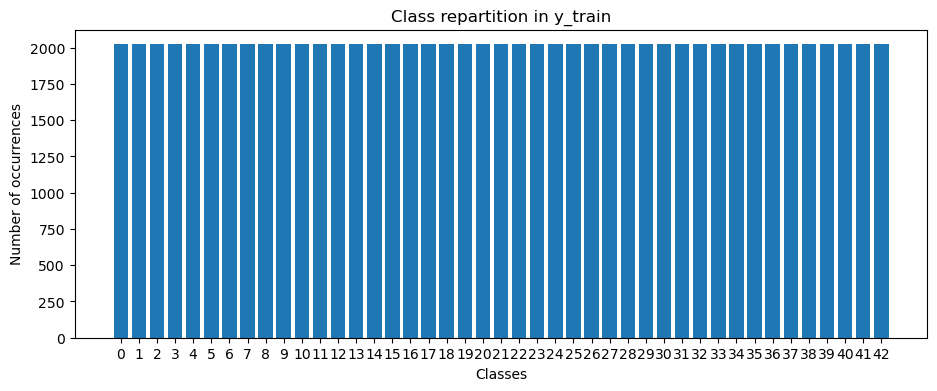

In [15]:
#Checking the repartition within training data
unique, counts = np.unique(y_train, return_counts=True)
# Historgramm
plt.figure(figsize=(11, 4))
plt.bar(unique, counts, tick_label=unique)
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.title('Class repartition in y_train')
plt.show()

## Visualizing some examples

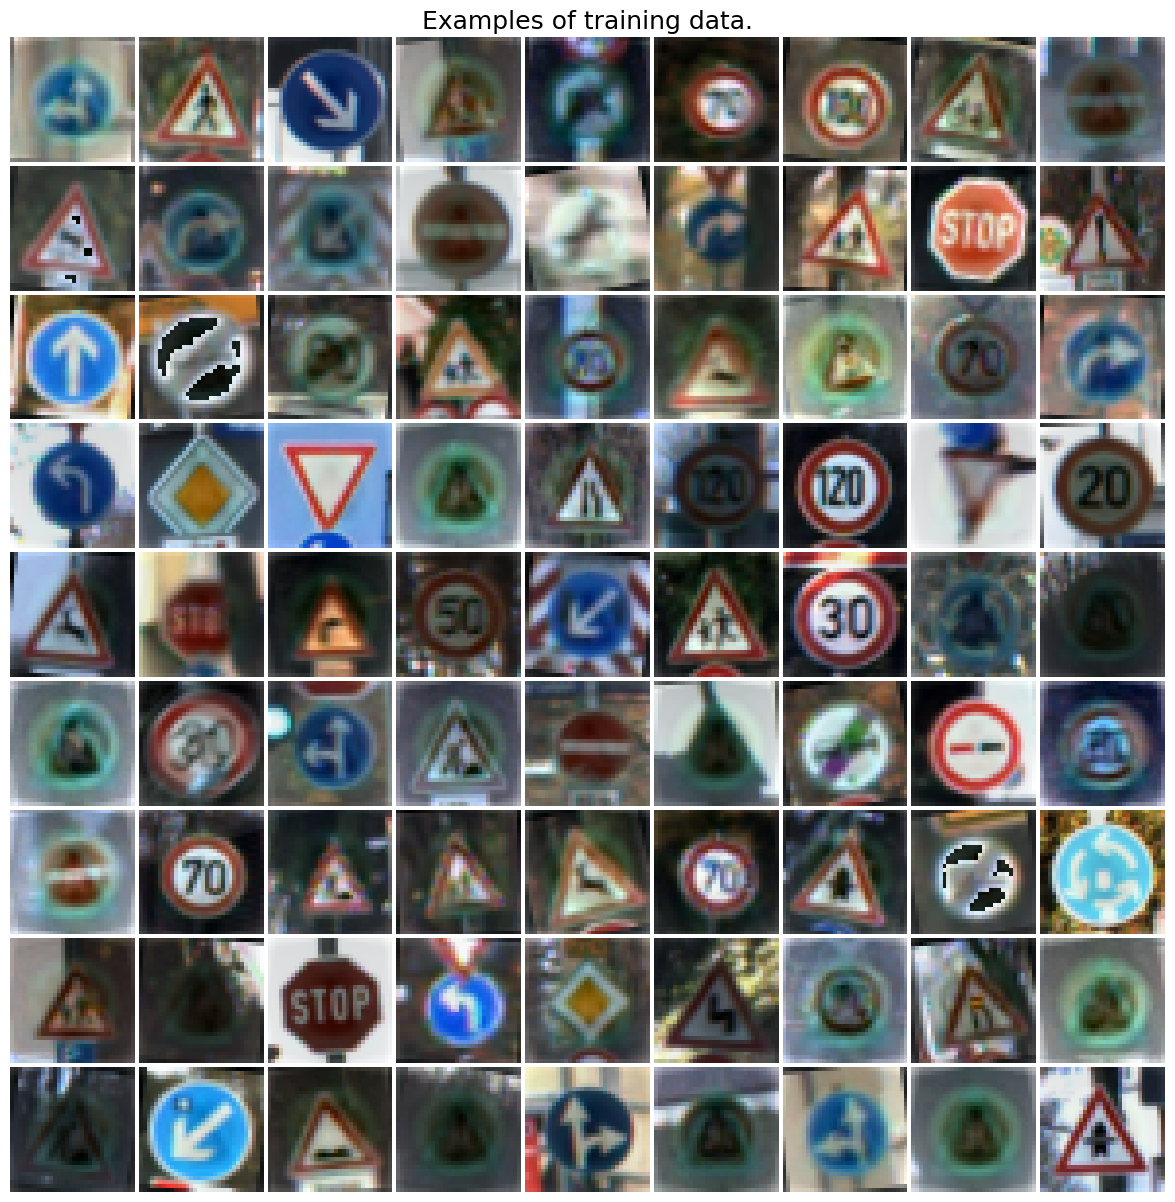

In [16]:
examples = x_train[:81, :, :, :]
# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Examples of training data.', fontsize=18)
plt.show()
plt.close()